In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv")

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df.shape

(11020, 16)

In [5]:
df.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [6]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [7]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.102000e+04,1.102000e+04,11020.000000,1.102000e+04,11020.000000,11020.000000
mean,1.372977e+18,3.518827e+04,1170.470236,1.533289e+04,1.360436,7.510617
std,3.311622e+16,2.942509e+05,2798.429673,4.944401e+04,11.364732,51.192608
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.347623e+18,1.110000e+02,164.000000,4.360000e+02,0.000000,0.000000
50%,1.360274e+18,4.790000e+02,460.000000,2.323500e+03,0.000000,1.000000
75%,1.395234e+18,2.171250e+03,1221.000000,1.114075e+04,1.000000,4.000000
max,1.463244e+18,1.371493e+07,103226.000000,1.213794e+06,678.000000,2315.000000


In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Make a copy of the 'text' column
text_df = df[['text']].copy()

# Apply text preprocessing to the 'text' column using .loc
text_df['text'] = text_df['text'].str.lower()
text_df['text'] = text_df['text'].str.replace(r'https\S+|www\S+https\S+','',regex=True)
text_df['text'] = text_df['text'].str.replace(r'\@w+|\#','',regex=True)
text_df['text'] = text_df['text'].str.replace(r'[^\w\s]','',regex=True)
text_df['text'] = text_df['text'].apply(word_tokenize)

# Define stopwords
stop_words = set(stopwords.words('english'))

In [9]:
from nltk.stem import PorterStemmer
text_df['text'] = text_df['text'].apply(lambda x: [w for w in x if not w in stop_words])
stemmer = PorterStemmer()
text_df['text'] = text_df['text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [10]:
from textblob import TextBlob
text_df['polarity'] = text_df['text'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
text_df['sentiment'] = text_df['polarity'].apply(lambda x: 'Negative' if x < 0 else ('Neutral' if x == 0 else 'Positive'))


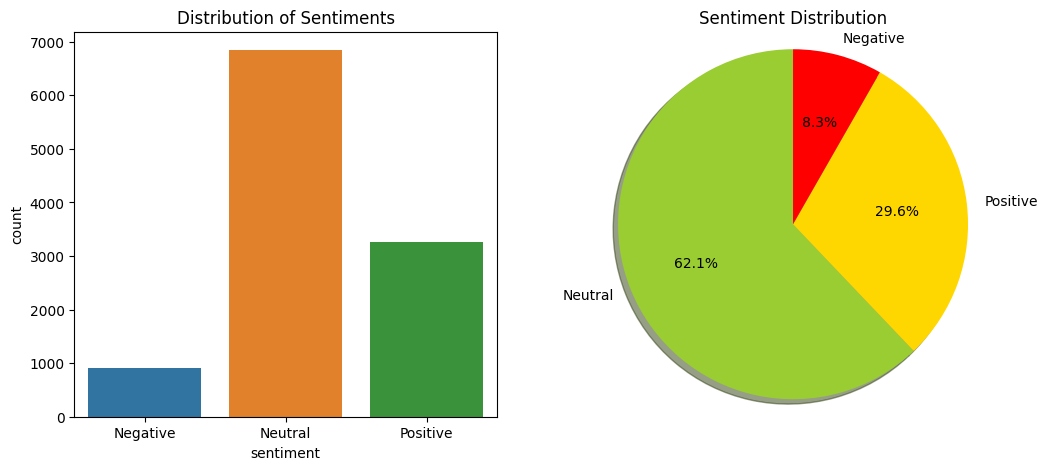

In [11]:
# Create subplots with two axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for sentiment distribution
sns.countplot(x="sentiment", data=text_df, ax=axes[0])
axes[0].set_title('Distribution of Sentiments')

# Pie chart to visualize sentiment distribution
sentiment_counts = text_df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ["yellowgreen", "gold", "red"]

axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Sentiment Distribution')

plt.show()

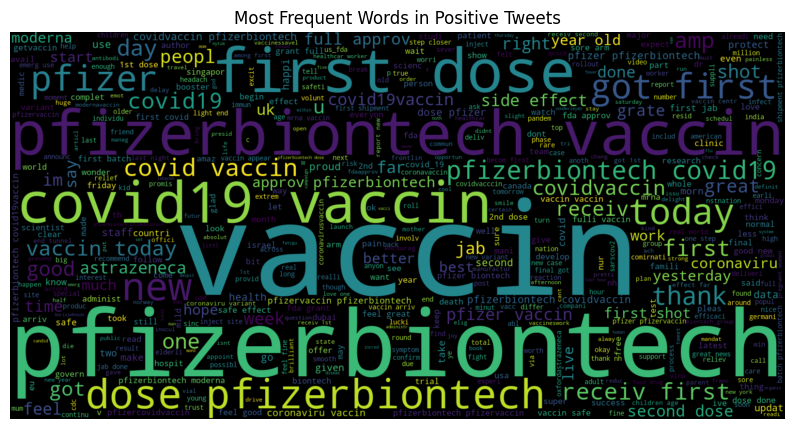

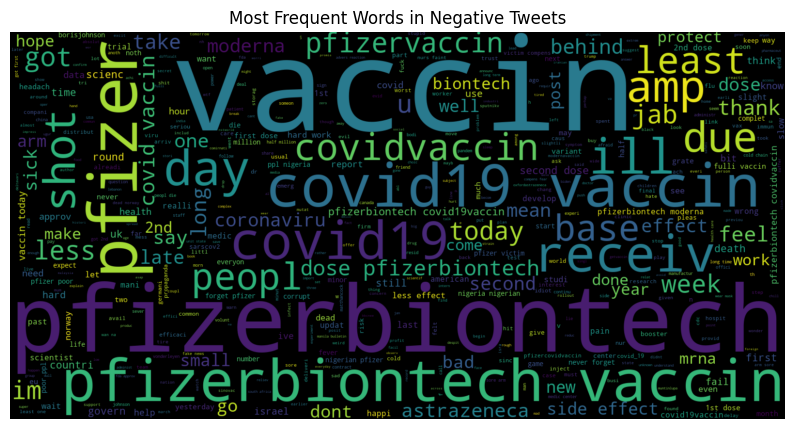

In [12]:
from wordcloud import WordCloud
def plot_word_cloud(sentiment, title):
    text = ' '.join([word for word in text_df[text_df['sentiment'] == sentiment]['text'].apply(lambda x: ' '.join(x))])
    wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)

plot_word_cloud('Positive', 'Most Frequent Words in Positive Tweets')
plot_word_cloud('Negative', 'Most Frequent Words in Negative Tweets')

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
text_df['text'] = text_df['text'].apply(lambda x: ' '.join(x))
vect = CountVectorizer(ngram_range=(1, 2)).fit(text_df['text'])
X = vect.transform(text_df['text'])
Y = text_df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)  # Increase the number of iterations
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
print("Test accuracy: {:.2f}%".format(logreg_acc*100))
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

Test accuracy: 89.47%
[[  75   98   22]
 [   0 1338    1]
 [   6  105  559]]


              precision    recall  f1-score   support

    Negative       0.93      0.38      0.54       195
     Neutral       0.87      1.00      0.93      1339
    Positive       0.96      0.83      0.89       670

    accuracy                           0.89      2204
   macro avg       0.92      0.74      0.79      2204
weighted avg       0.90      0.89      0.88      2204



In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)
print("Best parameters:", grid.best_params_)
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy after hyperparameter tuning: {:.2f}%".format(logreg_acc*100))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters: {'C': 10}
Test accuracy after hyperparameter tuning: 90.97%


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


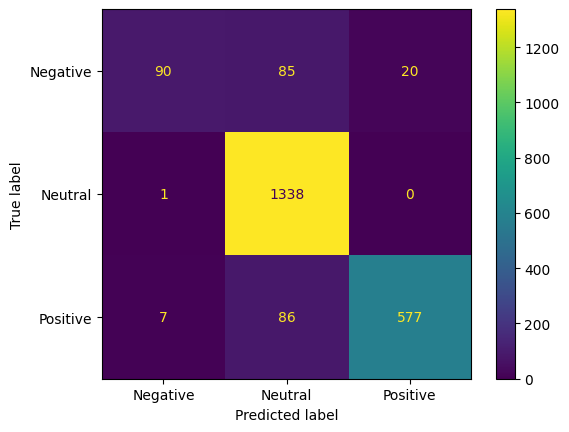

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

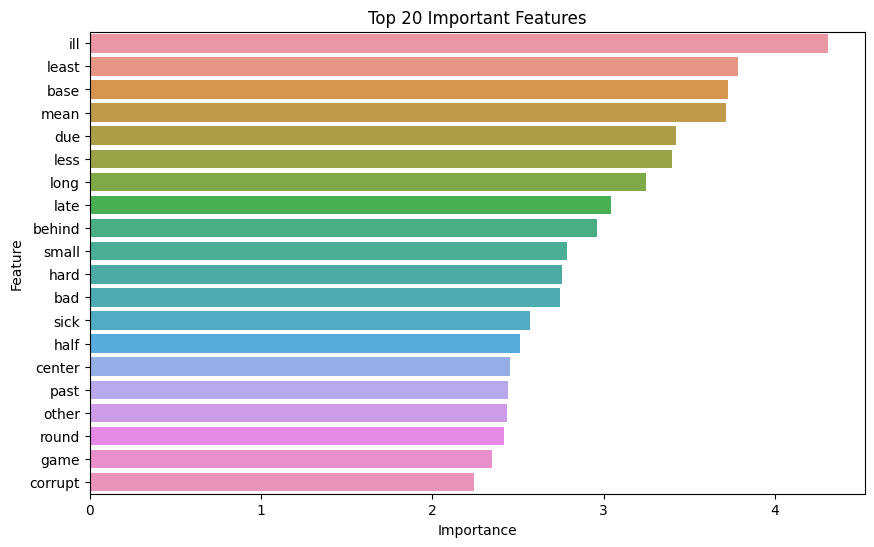

In [18]:
feature_names = vect.get_feature_names_out()
coef = grid.best_estimator_.coef_[0]

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coef})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Important Features')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

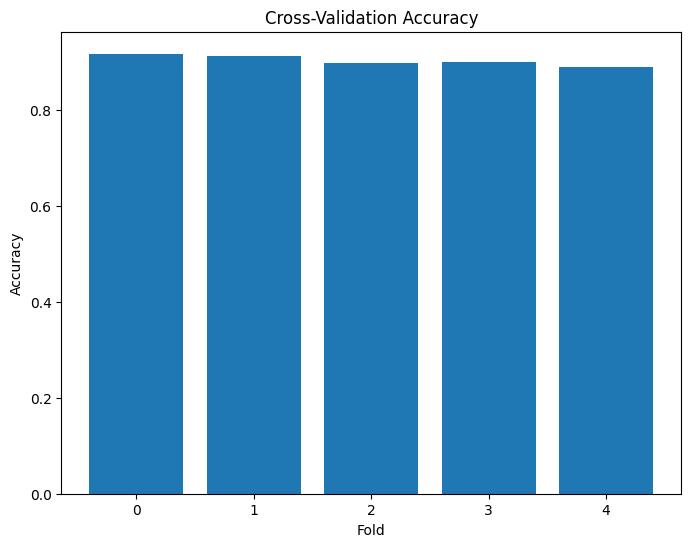

In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(grid.best_estimator_, X, Y, cv=5)
plt.figure(figsize=(8, 6))
plt.bar(range(len(cv_scores)), cv_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.show()
